# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></div><div class="lev1 toc-item"><a href="#Semantics" data-toc-modified-id="Semantics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Semantics</a></div><div class="lev2 toc-item"><a href="#Motivation" data-toc-modified-id="Motivation-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Motivation</a></div><div class="lev2 toc-item"><a href="#Term-Document" data-toc-modified-id="Term-Document-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Term-Document</a></div><div class="lev3 toc-item"><a href="#Bag-of-Words" data-toc-modified-id="Bag-of-Words-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Bag-of-Words</a></div><div class="lev4 toc-item"><a href="#Cleaning-Text-Data" data-toc-modified-id="Cleaning-Text-Data-2211"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Cleaning Text Data</a></div><div class="lev4 toc-item"><a href="#Stemming-and-Lemmatizing" data-toc-modified-id="Stemming-and-Lemmatizing-2212"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Stemming and Lemmatizing</a></div><div class="lev3 toc-item"><a href="#TF-IDF" data-toc-modified-id="TF-IDF-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>TF-IDF</a></div><div class="lev2 toc-item"><a href="#Term-Context" data-toc-modified-id="Term-Context-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Term-Context</a></div><div class="lev1 toc-item"><a href="#Word2Vec" data-toc-modified-id="Word2Vec-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word2Vec</a></div><div class="lev2 toc-item"><a href="#Continuous-Bag-of-Words" data-toc-modified-id="Continuous-Bag-of-Words-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Continuous Bag of Words</a></div><div class="lev2 toc-item"><a href="#Skip-gram" data-toc-modified-id="Skip-gram-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Skip-gram</a></div><div class="lev2 toc-item"><a href="#Example" data-toc-modified-id="Example-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Example</a></div><div class="lev1 toc-item"><a href="#Doc2Vec" data-toc-modified-id="Doc2Vec-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Doc2Vec</a></div><div class="lev2 toc-item"><a href="#Doc2Vec,-the-most-powerful-extension-of-word2vec" data-toc-modified-id="Doc2Vec,-the-most-powerful-extension-of-word2vec-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Doc2Vec, the most powerful extension of word2vec</a></div><div class="lev2 toc-item"><a href="#Distrubted-Memory-(DM)" data-toc-modified-id="Distrubted-Memory-(DM)-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Distrubted Memory (DM)</a></div><div class="lev2 toc-item"><a href="#Distrubted-Bag-of-Words-(DBOW)" data-toc-modified-id="Distrubted-Bag-of-Words-(DBOW)-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Distrubted Bag of Words (DBOW)</a></div><div class="lev1 toc-item"><a href="#Exercises" data-toc-modified-id="Exercises-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercises</a></div>

# Setup
----

This notebook assumes you have done the setup required in Week 1.

In this lecture we will be using Gensim and NLTK, two widely used Python Natural Language Processing libraries.

In [5]:
reset -f -s

In [6]:
def pip_install(*packages):
    '''
    Author: Sy Hwang, Hollis Nolan, Shuheng Liu 
    
    Install packages using pip
    Alternatively just use command line
    pip install package_name
    '''
    import pip
    if int(pip.__version__.split(".")[0]) >= 10:  # since 10.0.0, pip does not support pip.main() any more
        from pip._internal import main
    else:
        from pip import main

    for package in packages:
        try:
            main(["install", "--upgrade", package, "--user"])
        except Exception as e:
            print("Unable to install {} using pip.".format(package))
            print("Exception:", e)

In [7]:
pip_install('gensim', 'nltk')

  Using cached https://files.pythonhosted.org/packages/3a/bc/1415be59292a23ff123298b4b46ec4be80b3bfe72c8d188b58ab2653dee4/gensim-3.8.0.tar.gz


  Cache entry deserialization failed, entry ignored


  Cache entry deserialization failed, entry ignored


  Cache entry deserialization failed, entry ignored


  Cache entry deserialization failed, entry ignored


  Cache entry deserialization failed, entry ignored


  Stored in directory: C:\Users\pipi\AppData\Local\pip\Cache\wheels\2c\19\c6\bf38e867cb6e75999e3ff80302eb27bdf488b333efadfbfed7
  Stored in directory: C:\Users\pipi\AppData\Local\pip\Cache\wheels\5f\ea\fb\5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built gensim smart-open


Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'C:\\Users\\pipi\\AppData\\Local\\Temp\\pip-req-tracker-_jz44m28\\b3095b1324fb85a822887988cbb36067fa60285c59804dcfe133f1c4'



In [8]:
import nltk
nltk.download('gutenberg')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\pipi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\pipi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pipi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pipi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
import os
ROOTDIR = os.path.abspath(os.path.dirname('__file__'))
DATADIR = os.path.join(ROOTDIR, 'data')

# Semantics
---

## Motivation

If we want to be able to categorize text, we need to be able to generate features for articles, paragraphs, sentences and other bodies of text, based on the information they contain and what they represent. There are a number of ways to achieve this and we will go over 3 approaches.

## Term-Document

### Bag-of-Words

One of the simplest ways to extract features from text is to just count how many times a word appears in a body of text. In this model, the order of words does not matter and only the number of occurrences of each unique term for each document is taken into account.

In [10]:
import pandas as pd

#Load movie reviews dataset
df = pd.read_csv(os.path.join(DATADIR, 'movie_reviews.csv'), nrows=100000)
texts = df.text.values #pd.Series -> np.ndarray

In [11]:
import nltk
# Transform each review string as a list of token strings. May take a few seconds
tokenized = [nltk.word_tokenize(review) for review in texts]

In [12]:
n = 10 #arbitrary pick
print('Example review:\n   Raw: {} \n\n   Tokenized: {}'.format(texts[n], [i for i in tokenized[n]]))

Example review:
   Raw: So ingenious in concept, design and execution that you could watch it on a postage stamp-sized screen and still be engulfed by its charm. 

   Tokenized: ['So', 'ingenious', 'in', 'concept', ',', 'design', 'and', 'execution', 'that', 'you', 'could', 'watch', 'it', 'on', 'a', 'postage', 'stamp-sized', 'screen', 'and', 'still', 'be', 'engulfed', 'by', 'its', 'charm', '.']


#### Cleaning Text Data

##### Removing Stopwords and Punctuations, Lower-case

- Sometimes it's useful to drop __Stopwords__ when breaking down documents into units of tokens. Stopwords are terms that appear so frequently in a corpus that they provide little to no informative value to the task at hand. Common stopwords include words like *the*, *of*, *to*, and *for*.   
- __Punctuations__ are very much the same; while they may provide linguistic context, punctuations can sometimes be too common to provide any value.

Let's take a look at the most common tokens in our movie reviews dataset:

In [13]:
from collections import Counter

#Note that we convert all tokens to lower case, otherwise words like *The* and *the* are different tokens.
token_counter = Counter(token.lower() for sentence in tokenized for token in sentence)
top10 = token_counter.most_common()[:10]
for i, t in enumerate(top10):
    print('{:>2}.{:>5}  freq: {:>7}'.format(i+1, t[0], t[1]))

 1.    .  freq:  102815
 2.    ,  freq:   97049
 3.  the  freq:   94390
 4.    a  freq:   66933
 5.   of  freq:   58012
 6.  and  freq:   57274
 7.   to  freq:   36228
 8.   's  freq:   34515
 9.   is  freq:   33891
10.   it  freq:   30890


These are all either stopwords or punctuations!  
Thankfully there's an easy way to remove them: `nltk` and the built-in `string` module have separate lists of stopwords and punctuations

#### Stemming and Lemmatizing

- We can also find lots of words that have similar meanings, but differ only by their conjugation and inflections. Sometimes it makes sense to normalize different forms of the same word to a single root token before indexing. There are two ways to do this:
    - __Stemming__: heuristic approach that chops off the endings of different forms of words, trying to return the root morpheme that stays the same even with varying inflections.
        - Example:
            - I saw that movie and it was terrible $\rightarrow$ I saw that movi and it wa terribl
            - informative informational inform informing $\rightarrow$ inform inform inform inform     

    - __Lemmatizing__: returns the derivational normal form or the dictionary form of the word, called the lemma
        - Example:
            - I saw that movie and it was terrible $\rightarrow$ I see that movie and it be terrible
            - am are is be $\rightarrow$ be be be be
            

![](images/preprocessing_text.png)

In [14]:
from nltk.corpus import stopwords
from string import punctuation
from itertools import chain

def clean_text(tokenized_list, sw, punct, lemmatize=False):
    new_list = []
    for doc in tokenized_list:
        new_list.append([token.lower() for token in doc if token.lower() not in chain(punct, sw)])
    return new_list

# Remove punctuations and stopwords, and lower-case text
sw = stopwords.words('english')
punct = punctuation
cleaned = clean_text(tokenized, sw, punct)

In [16]:
from gensim import corpora

# Create a dictionary from list of documents in order to create BOW model
dictionary = corpora.Dictionary(cleaned)

'pattern' package not found; tag filters are not available for English
adding document #0 to Dictionary(0 unique tokens: [])
adding document #10000 to Dictionary(19384 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)


C:\Users\pipi\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


adding document #20000 to Dictionary(28227 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
adding document #30000 to Dictionary(34412 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
adding document #40000 to Dictionary(39845 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
adding document #50000 to Dictionary(45053 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
adding document #60000 to Dictionary(50133 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
adding document #70000 to Dictionary(54465 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
adding document #80000 to Dictionary(58483 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
adding document #90000 to Dictionary(62720 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'generation']...)
built Dictionary(67641 unique tokens: ['...', 'entire', 'ever', 'filmgoers', 'ge

In [17]:
# Create a Corpus based on BOW Format.
corpus = [dictionary.doc2bow(text) for text in cleaned]
print('Example review featurized in Bag of Words :\n {}'.format([(dictionary[i[0]], i[1]) for i in corpus[n]]))

Example review featurized in Bag of Words :
 [('still', 1), ('charm', 1), ('concept', 1), ('could', 1), ('design', 1), ('engulfed', 1), ('execution', 1), ('ingenious', 1), ('postage', 1), ('screen', 1), ('stamp-sized', 1), ('watch', 1)]


Note that when we use this model to featurize text:
- The length of each feature vector will be the size of the vocabulary in the corpus
- Thus each body of text will have a lot of zeroes

### TF-IDF

__Term Frequency__: Number of occurrences of a word in a document  
__Inverse Document Frequency__: Number of documents that contain a certain word scaled by a weight  
__Term Frequency - Inverse Document Frequency__: (Number of ocurrences of word $w$ in text $T$) * $log$(Number of documents in a corpus/Number of documents containing word $w$)



Let's check out the TF-IDF scores of the previous movie review we examined.

In [18]:
from gensim import corpora, models

#Create a TFIDF Model for the corpus
tfidf = models.TfidfModel(corpus)

print('Example review featurized with TF-IDF scores : \n{}'.format([(dictionary[i[0]], round(i[1],3)) for i in tfidf[corpus[n]]]))

collecting document frequencies
PROGRESS: processing document #0
PROGRESS: processing document #10000
PROGRESS: processing document #20000
PROGRESS: processing document #30000
PROGRESS: processing document #40000
PROGRESS: processing document #50000
PROGRESS: processing document #60000
PROGRESS: processing document #70000
PROGRESS: processing document #80000
PROGRESS: processing document #90000
calculating IDF weights for 100000 documents and 67640 features (1110955 matrix non-zeros)
Example review featurized with TF-IDF scores : 
[('still', 0.152), ('charm', 0.206), ('concept', 0.244), ('could', 0.159), ('design', 0.25), ('engulfed', 0.431), ('execution', 0.259), ('ingenious', 0.293), ('postage', 0.414), ('screen', 0.176), ('stamp-sized', 0.458), ('watch', 0.191)]


Looks much more like a feature vector that we can use for text categorization!  
Note that in the TF-IDF model:
- If a term frequently occurs in the corpus(i.e. stopwords, the term $like$), it is scaled to a lower score
- Rarer terms will generally have higher scores. They tend to be more "informative" and descriptive.
- A term that occurs frequently in a small number of documents within the corpus will have the highest scores.

![](images/tfidf.jpg)

## Term-Context

The vast majority of NLP works regards as atomic symbols: king, queen, book, etc.

In vector space terms, this vector has one $1 $ and a lot of zeros.   
$king =  [1, 0, 0, 0, 0, 0, 0, 0, 0]$   
$queen = [0, 1, 0, 0, 0, 0, 0, 0, 0]$   
$book =  [0, 0, 1, 0, 0, 0, 0, 0, 0]$  

It is called a "one-hot" encoding representation. It is a common way to represent categories in models. However, it is very sparse(as we saw from the BOW model); each row is mostly 0s.  
You can get more value by representing a word by its neighorbors

Instead of using entire documents, we can use small contexts to a term.
- Paragraphs
- Sentences
- A window of a sequence of consecutive terms

In this way, a word is defined over counts of context words. The assumption is that two words that appear in similar contexts are similar themselves.

But count-based models have disadvantages:
- vector sizes become huge, equal to vocabulary size
    - sparsity
    - curse of dimensionality (Go through [this notebook](https://github.com/mike-tamir/tamir_extras/blob/master/Curse_of_Dim_walkthrough.ipynb) for more detailed information)
    - computationally expensive
    

# Word2Vec

Word2Vec is an unsupervised neural network model that maximizes similarity between contextual neighbors while minimizing similarity for unseen contexts.
Initial vectors are generated randomly and converge as the models is trained on the corpus through a sliding window.
Target Vector sizes are set at the beginning of the training process, so the vectors are dense and do not need dimensionality reduction techniques.



## Continuous Bag of Words

![](images/cbow.png)

Training objective is to maiximize the probability of observing the correct target word $w_t$ given context words $w_{c1}, w_{c2}, ... w_{cj}$

 $$ C = -log p(w_t | w_{c1} ... w_{cj}) $$

The prediction vector is set as an average of all the context word vectors

## Skip-gram

![](images/skip-gram.png)

Training objective is to maiximize the probability of observing the correct context words $w_{ci}$ given target word $w_{t}$

 $$ C = -\sum^{j}_{i=1}log p(w_{ci} | w_{t}) $$
 
In this case, the prediction vector is the the target word vector.

## Example

Now let's try training our own word embeddings and looking at what we can do with them.

Word2Vec
- `size`: Number of dimensions for the word embedding model
- `window`: Number of context words to observe in each direction
- `min_count`: Minimum frequency for words included in model
- `sg` (Skip-Gram): '0' indicates CBOW model; '1' indicates Skip-Gram
- `alpha`: Learning rate (initial); prevents model from over-correcting, enables finer tuning
- `iterations`: Number of passes through dataset
- `batch_words`: Number of words to sample from data during each pass

In [19]:
from nltk.corpus import gutenberg
from gensim import models

# Training word2vec model on Gutenberg corpus. This may take a few minutes.
model = models.Word2Vec(gutenberg.sents(),
                        size = 300,
                        window = 5,
                        min_count = 5,
                        sg = 0,
                        alpha = 0.025,
                        iter = 10,
                        batch_words = 10000)

collecting all words and their counts
PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
PROGRESS: at sentence #10000, processed 256693 words, keeping 9207 word types
PROGRESS: at sentence #20000, processed 567137 words, keeping 13603 word types
PROGRESS: at sentence #30000, processed 918759 words, keeping 17616 word types
PROGRESS: at sentence #40000, processed 1236460 words, keeping 19579 word types
PROGRESS: at sentence #50000, processed 1508401 words, keeping 22623 word types
PROGRESS: at sentence #60000, processed 1715918 words, keeping 27910 word types
PROGRESS: at sentence #70000, processed 1915119 words, keeping 30708 word types
PROGRESS: at sentence #80000, processed 2144824 words, keeping 35822 word types
PROGRESS: at sentence #90000, processed 2415166 words, keeping 44470 word types
collected 51134 word types from a corpus of 2621785 raw words and 98552 sentences
Loading a fresh vocabulary
min_count=5 retains 17011 unique words (33% of original 51134, drops 34

![](http://multithreaded.stitchfix.com/assets/images/blog/vectors.gif)

The word vectors are directions in space and can encode relationships between words.  

The proximity of words to each other can be calculated through their cosine similarity.

In [20]:
# words closest to the token 'boy'
model.wv.most_similar(positive=['boy'])

precomputing L2-norms of word weight vectors


[('maid', 0.7113270163536072),
 ('child', 0.6988879442214966),
 ('lad', 0.6885336637496948),
 ('Farmer', 0.6741182208061218),
 ('girl', 0.6726040840148926),
 ('fellow', 0.613610565662384),
 ('mother', 0.6096839904785156),
 ('gentleman', 0.605623722076416),
 ('lady', 0.6028754711151123),
 ('Susan', 0.5991085171699524)]

In [21]:
# words closest to the token 'food'
model.wv.most_similar(positive=['food'])

[('wine', 0.6826830506324768),
 ('bread', 0.6824086904525757),
 ('meat', 0.6805968284606934),
 ('cattle', 0.6408922076225281),
 ('flocks', 0.6404011249542236),
 ('corn', 0.6312136650085449),
 ('fruits', 0.628380537033081),
 ('wheat', 0.6257160902023315),
 ('prey', 0.6190413236618042),
 ('lambs', 0.6120137572288513)]

In [22]:
# she + her + hers + herself - he - him - his - himself
model.wv.most_similar(positive=['she','her','hers','herself'], negative=['he','him','his','himself'])

[('particularly', 0.5025079250335693),
 ('Fairfax', 0.4188178777694702),
 ('Anne', 0.40248051285743713),
 ('allowed', 0.3808298408985138),
 ('idle', 0.3794349431991577),
 ('Mary', 0.3785339593887329),
 ('relating', 0.3769521117210388),
 ('absolutely', 0.3764355480670929),
 ('longing', 0.3748558461666107),
 ('elegant', 0.37446707487106323)]

In [23]:
# Let's limit ourselves to top 50 words that related to food to visualize how they relate in vector space
f_tokens = [token for token,weight in model.wv.most_similar(positive=['food'], topn=50)]

In [24]:
from sklearn.metrics import pairwise
vectors = [model.wv[word] for word in f_tokens]
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')

In [25]:
from sklearn.manifold import MDS
mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)

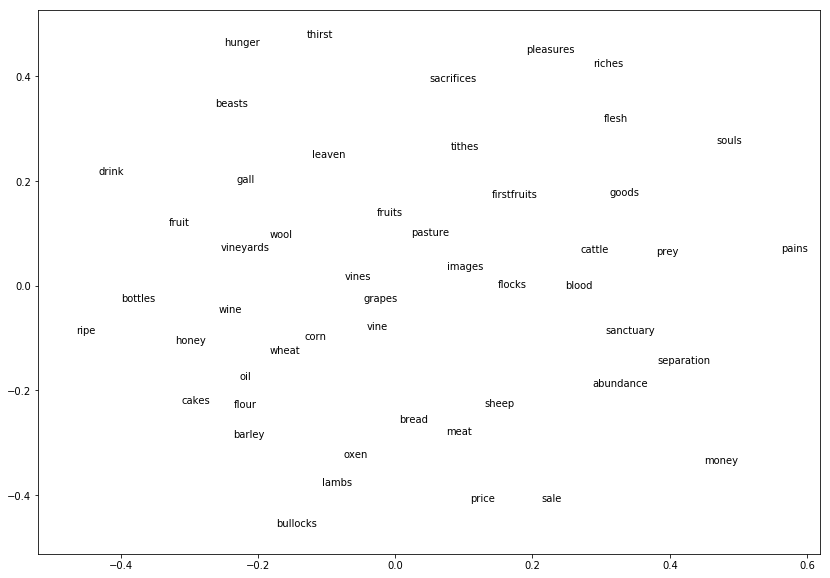

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


_, ax = plt.subplots(figsize=(14,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(f_tokens[i], ((embeddings[i,0], embeddings[i,1])))

**What kind of clusters of food-themed terms can you notice?**

- Words that are grouped together generally appear in the same context
    - Some examples:
        - vineyards - vines - grapes
        - hunger - thirst
        - corn - wheat - barley
- Note that we're dealing with vectors that have been reduced from 300 dimensions to 2 dimensions for visualization purposes. We have also limited our subset to those nearest to the token *food*.
- Also note that we are working with the [Gutenberg corpus](http://www.nltk.org/book/ch02.html), which is a collection of mostly old English literature books, such as works from Jane Austen and William Shakespeare.

# Doc2Vec

---
Doc2Vec, the most powerful extension of word2vec
---

Doc2vec (aka paragraph2vec or sentence embeddings) extrapolates the word2vec algorithm to larger blocks of text, such as sentences, paragraphs or entire documents. 

![](images/overview_word.png)

![](images/overview_paragraph.png)

Every paragraph is mapped to a unique vector, represented by a column in matrix D and every word is also mapped to a unique vector, represented by a column in matrix W . 
The paragraph vector and word vectors are averaged or concatenated to predict the next word in a context. 

Each additional context does not have be a fixed length (because it is vectorized and projected into the same space).

Additional parameters but the updates are sparse thus still efficent.

__2 architectures__:

1. Distrubted Memory (DM)
2. Distrubted Bag of Words (DBOW)

## Distrubted Memory (DM)

__Highlights__:

- Assign and randomly initialize paragraph vector for each doc
- Predict next word using context words and paragraph vector
- Slide context window across doc but keep paragraph vector fixed (hence: Distrubted Memory)
- Update weights via SGD and backprop

## Distrubted Bag of Words (DBOW)

__Highlights__:

- ONLY use paragraph vectors (no word vectors)
- Take a window of words in a paragraph and randomly sample which ones to predict using paragraph vector
- Simpler, more memory effecient

![](images/DBOW.png)

Let's try building our own Doc2Vec model with Gensim

Doc2Vec Parameters
- `size`: Number of dimensions for the embedding model
- `window`: Number of context words to observe in each direction within a document
- `min_count`: Minimum frequency for words included in model
- `dm` (distributed memory): '0' indicates DBOW model; '1' indicates DM
- `alpha`: Learning rate (initial); prevents model from over-correcting, enables finer tuning
- `iter`: Number of iterations through corpus

In [27]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.corpus import reuters

# Tokenize Reuters corpus
tokenized_docs = [nltk.word_tokenize(reuters.raw(fileid)) for fileid in reuters.fileids()]

# Convert tokenized documents to TaggedDocuments
tagged_docs = [TaggedDocument(doc, tags=[idx]) for idx, doc in enumerate(tokenized_docs)]

# Create and train the doc2vec model. May take a few seconds
doc2vec = Doc2Vec(size=300, window=5, min_count=5, dm = 1, iter=10)

# Build the word2vec model from the corpus
doc2vec.build_vocab(tagged_docs)

collecting all words and their counts
PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
PROGRESS: at example #10000, processed 1432016 words (7925120/s), 60879 word types, 10000 tags


C:\Users\pipi\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
C:\Users\pipi\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


collected 63346 word types and 10788 unique tags from a corpus of 10788 examples and 1548597 words
Loading a fresh vocabulary
min_count=5 retains 15255 unique words (24% of original 63346, drops 48091)
min_count=5 leaves 1472902 word corpus (95% of original 1548597, drops 75695)
deleting the raw counts dictionary of 63346 items
sample=0.001 downsamples 45 most-common words
downsampling leaves estimated 1118205 word corpus (75.9% of prior 1472902)
estimated required memory for 15255 words and 300 dimensions: 57185100 bytes
resetting layer weights


In [40]:
doc2vec.infer_vector("Does anyone remember when Madonna was considered shocking?")
doc2vec.docvecs['doc003']

KeyError: "tag 'doc003' not seen in training corpus/invalid"

You can also fortify your Doc2Vec models with pre-trained Word2Vec models.
Let's try re-training with GoogleNews-trained word vectors.  
Download [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)  
(Size is 1.5gb)

In [38]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.corpus import reuters
#This may take a few minutes to run
w2v_loc = "Users\pipi\Desktop\FakeNewsTutorials-master\JupyterNotebook\Hw 2"# your saved location of GoogleNews-vectors-negative300.bin.gz
doc2vec.intersect_word2vec_format(w2v_loc, binary=True)

AttributeError: 'Doc2Vec' object has no attribute 'intersect_word2vec_format'

In [ ]:
doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)

# Exercises

Using what you have learned from Week 1 and today's lecture, build a binary classifier for the movie reviews dataset in `data/movie_reviews.csv`.

In [41]:
from gensim.test.utils import get_tmpfile
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
newmodel = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
fname = get_tmpfile("GoogleNews-vectors-negative300.bin.gz")

newmodel.save(fname)
newmodel = Doc2Vec.load(fname)  # you can continue training with the loaded model!

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


consider setting layer size to a multiple of 4 for greater performance


collecting all words and their counts
PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
collected 12 word types and 9 unique tags from a corpus of 9 examples and 29 words
Loading a fresh vocabulary
min_count=1 retains 12 unique words (100% of original 12, drops 0)
min_count=1 leaves 29 word corpus (100% of original 29, drops 0)
deleting the raw counts dictionary of 12 items
sample=0.001 downsamples 12 most-common words
downsampling leaves estimated 3 word corpus (12.1% of prior 29)
estimated required memory for 12 words and 5 dimensions: 6660 bytes
resetting layer weights
training model with 4 workers on 12 vocabulary and 5 features, using sg=0 hs=0 sample=0.001 negative=5 window=2
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 29 raw words (13 effective words

under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


saving Doc2Vec object under C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz, separately None
saved C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz
loading Doc2Vec object from C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz
loading vocabulary recursively from C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz.vocabulary.* with mmap=None
loading trainables recursively from C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz.trainables.* with mmap=None
loading wv recursively from C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz.wv.* with mmap=None
loading docvecs recursively from C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz.docvecs.* with mmap=None
loaded C:\Users\pipi\AppData\Local\Temp\GoogleNews-vectors-negative300.bin.gz


C:\Users\pipi\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
